<a href="https://colab.research.google.com/github/jackie-charms/NovaPlastic/blob/master/Pr%C3%A1cticas/Pr%C3%A1ctica-Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt #para graficar

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
#importar la base de datos
dataset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/pima-indians-diabetes.data', delimiter=',')

In [4]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
X = dataset[:, 0:8] #entrada deseada
Y = dataset[:, 8] #salida deseada

In [6]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [7]:
#normalizar el mínimo y máximo (el rango)
scaler = MinMaxScaler(feature_range= (0, 1))
X= scaler.fit_transform(X)

In [8]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5)

In [10]:
x_train.shape

(384, 8)

In [11]:
y_train.shape

(384,)

In [12]:
model = Sequential()
model.add(Dense(12, input_dim= 8, activation= 'tanh')) #cuantas entradas y cuantas salidas
model.add(Dense(10, activation= 'tanh')) #capa oculta que toma las entradas anteriores
model.add(Dense(1, activation= 'sigmoid')) #ultima capa con 8 entradas y 1 salida

In [13]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 150, batch_size= 10)

Epoch 1/150
39/39 [==============================] - 3s 30ms/step - loss: 0.7290 - accuracy: 0.4271 - val_loss: 0.6899 - val_accuracy: 0.5417
Epoch 2/150
39/39 [==============================] - 1s 16ms/step - loss: 0.6585 - accuracy: 0.6667 - val_loss: 0.6767 - val_accuracy: 0.6198
Epoch 3/150
39/39 [==============================] - 1s 13ms/step - loss: 0.6403 - accuracy: 0.6849 - val_loss: 0.6763 - val_accuracy: 0.6172
Epoch 4/150
39/39 [==============================] - 1s 14ms/step - loss: 0.6331 - accuracy: 0.6849 - val_loss: 0.6788 - val_accuracy: 0.6172
Epoch 5/150
39/39 [==============================] - 0s 10ms/step - loss: 0.6293 - accuracy: 0.6849 - val_loss: 0.6776 - val_accuracy: 0.6172
Epoch 6/150
39/39 [==============================] - 0s 13ms/step - loss: 0.6273 - accuracy: 0.6849 - val_loss: 0.6770 - val_accuracy: 0.6172
Epoch 7/150
39/39 [==============================] - 1s 21ms/step - loss: 0.6252 - accuracy: 0.6849 - val_loss: 0.6768 - val_accuracy: 0.6172
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

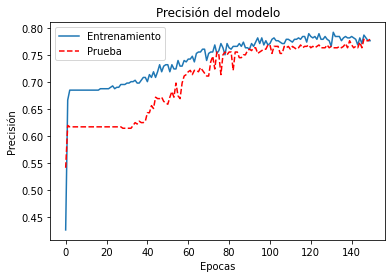

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('figura01.png', dpi=300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

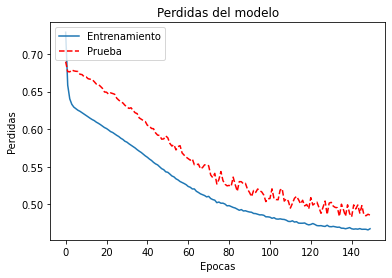

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.savefig('figura02.png', dpi=300)
plt.show

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_predic = model.predict(x_test)

12/12 [==============================] - 0s 2ms/step


In [19]:
y_predic

array([[0.18023205],
       [0.85887134],
       [0.26503524],
       [0.29691106],
       [0.10663587],
       [0.24988653],
       [0.6625084 ],
       [0.36344382],
       [0.1756071 ],
       [0.41580707],
       [0.22783233],
       [0.7548659 ],
       [0.34843594],
       [0.15881206],
       [0.19644089],
       [0.5907467 ],
       [0.11409219],
       [0.06942813],
       [0.24892594],
       [0.48556152],
       [0.07364365],
       [0.89007646],
       [0.90716887],
       [0.14974955],
       [0.43066713],
       [0.74701744],
       [0.10078692],
       [0.50259495],
       [0.24467479],
       [0.28722855],
       [0.13171232],
       [0.05694576],
       [0.5255762 ],
       [0.591573  ],
       [0.5891242 ],
       [0.7197199 ],
       [0.6932304 ],
       [0.26062155],
       [0.47823262],
       [0.2947824 ],
       [0.21370348],
       [0.31247008],
       [0.20720543],
       [0.4186941 ],
       [0.25892538],
       [0.24087252],
       [0.0275488 ],
       [0.700

In [20]:
y_predic.shape

(384, 1)

In [21]:
y_predic = np.rint(y_predic)

In [22]:
y_predic

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [23]:
from sklearn.metrics import confusion_matrix

# y_test "deseadas (reales, actuales)"
# y_predic "salidas de la RNA (predicciones)"

results = confusion_matrix(y_test, y_predic)
print(results)

[[218  19]
 [ 66  81]]
